In [1]:
import pandas as pd
import quandl
import numpy as np
import math
from sklearn import preprocessing,  svm  
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

df=quandl.get('WIKI/GOOGL', apiKey="AVDHZ6w1y-sYpRWsaA6R")
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [2]:
df=df[['Adj. Open','Adj. High','Adj. Low','Adj. Close', 'Adj. Volume']]
df['HL_PCT']=(df['Adj. High']-df['Adj. Close'])/df['Adj. Close']*100.0
df['PCT_change']=(df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100.0

df=df[['Adj. Close','HL_PCT', 'PCT_change','Adj. Volume']]
print(df.head())
# print(df)

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0


In [3]:
import math
forecast_col= 'Adj. Close'

df.fillna(-999999, inplace=True)
forecast_out=int(math.ceil(0.1* len(df))) #some shift which i donot understand
df['label']=df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume       label
Date                                                                 
2004-08-19   50.322842  3.712563    0.324968   44659000.0  214.005615
2004-08-20   54.322689  0.710922    7.227007   22834300.0  210.725489
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  208.072299
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  218.288837
2004-08-25   53.164113  1.886792    1.183658    9188600.0  223.309335


In [4]:
#training and testing
x=np.array(df.drop(['label'],1))
y=np.array(df['label'])

X=preprocessing.scale(x)
# X=X[:forecast_out+1]
df.dropna(inplace=True)
y=np.array(df['label'])

print(len(x), len(y))

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=100)

# classifier
clf=LinearRegression()
clf.fit(X_train, y_train)#train with fit

with open('LinearRegression.pickle', 'wb' ) as f:
        pickle.dump(clf,f)
pickle_in=open('LinearRegression.pickle','rb')

clf=pickle.load(pickle_in)
accuracy=clf.score(X_test, y_test)#score is with test
print(accuracy)
print(forecast_out)# what is happening?

#lets say we want to use a different algorithm, we cahange
#clf=svm.SVR()

3081 3081
0.8820623903970934
343


C:\Users\NISHANT DEY\AppData\Local\Temp\ipykernel_1636\1224772441.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=np.array(df.drop(['label'],1))


In [5]:
#forecasting
df['label']=df[forecast_col].shift(-forecast_out)
X=np.array(df.drop(['label'],1))#what is this?
X=preprocessing.scale(X)

X_lately=X[-forecast_out:] #predict against this
X=X[:-forecast_out] #what is happening here?

df.dropna(inplace=True)
y=np.array(df['label'])
y=np.array(df['label'])

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=100)

clf=LinearRegression()
clf.fit(X_train, y_train)

forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[661.19939354 657.11682238 654.94237972 671.76153523 696.14250465
 713.43050782 703.6043731  726.97071919 831.55685871 823.75235971
 843.89118911 848.02807843 815.30694756 791.61350802 798.61878161
 785.49895102 783.91429694 797.7746836  783.73733325 795.75294717
 791.14499844 813.66391416 795.37963717 790.01503462 794.90968761
 823.47722421 818.49563756 820.17509293 823.43135773 825.71814329
 822.76864793 831.22620692 820.47366392 785.4274065  794.72689636
 757.43247179 796.93290992 793.8792465  787.22437982 788.23669973
 768.42459304 769.13691234 769.96233138 754.21544953 766.35277238
 778.32699673 784.4373564  779.52469838 774.96237607 800.38967906
 791.24489561 814.35127634 790.14193674 792.38006065 776.8136247
 785.88073149 783.02038546 773.02996328 759.50064918 757.40579243
 762.2786719  766.44137825 796.62917457 804.84397051 807.22704135
 798.9933928  793.79470313 801.33507396 808.58334932 823.01907698
 816.91642394 825.25368636 820.95133017 831.12395653 816.32713486
 805.999528

C:\Users\NISHANT DEY\AppData\Local\Temp\ipykernel_1636\1206519829.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=np.array(df.drop(['label'],1))#what is this?


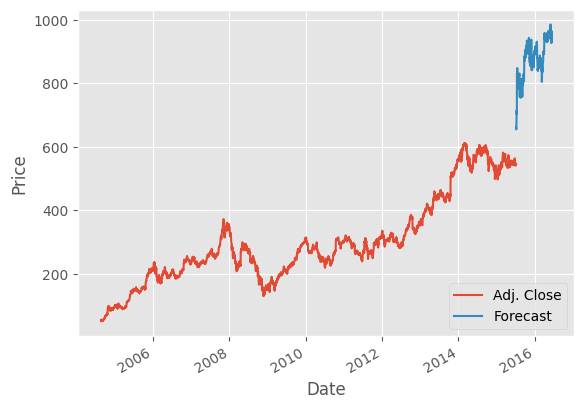

In [6]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')
df['Forecast']=np.nan

last_date=df.iloc[-1].name
# print(last_date)
last_unix=last_date.timestamp()#this will give answer in seconds
one_day=86400
next_unix=last_unix+one_day

# populate the data frame with new dates and forecast values
for i in forecast_set:
        #i is the forecasted values of stock on different dates
        next_date=datetime.datetime.fromtimestamp(next_unix) #this will give the date from the seconds information
        next_unix+=one_day
        # print(i)
        df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+[i] 
        # this line sets the first column to nan and the last column to forecast value (i). 
        #.loc will be referencing index for the dataframe and date is the index
        #the for loop will fill nan values for the first 4 columns and the forecast is added to the last column 
# print(df.head())
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)#bottom right
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

at this point we want to save the classifier so that we donot have to train the classifier again and again. x